In [2]:
pip install prophet

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [11]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [13]:
from prophet import Prophet

In [14]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpja5x3b2x/1z171fjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpja5x3b2x/2uiqx10_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67628', 'data', 'file=/tmp/tmpja5x3b2x/1z171fjt.json', 'init=/tmp/tmpja5x3b2x/2uiqx10_.json', 'output', 'file=/tmp/tmpja5x3b2x/prophet_modelknjqzhk5/prophet_model-20230906144945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
fc =m.make_future_dataframe(periods = 60, include_history = True)

In [16]:
fc

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
2960,2016-03-16
2961,2016-03-17
2962,2016-03-18
2963,2016-03-19


In [17]:
forecast = m.predict(fc)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039109,8.210344,9.451985,8.039109,8.039109,0.802955,0.802955,0.802955,0.352288,0.352288,0.352288,0.450667,0.450667,0.450667,0.0,0.0,0.0,8.842064
1,2007-12-11,8.037568,7.962399,9.185126,8.037568,8.037568,0.553030,0.553030,0.553030,0.119622,0.119622,0.119622,0.433408,0.433408,0.433408,0.0,0.0,0.0,8.590598
2,2007-12-12,8.036026,7.745542,8.994375,8.036026,8.036026,0.350425,0.350425,0.350425,-0.066659,-0.066659,-0.066659,0.417084,0.417084,0.417084,0.0,0.0,0.0,8.386452
3,2007-12-13,8.034485,7.733469,8.974647,8.034485,8.034485,0.329872,0.329872,0.329872,-0.072268,-0.072268,-0.072268,0.402140,0.402140,0.402140,0.0,0.0,0.0,8.364357
4,2007-12-14,8.032944,7.720213,8.965895,8.032944,8.032944,0.319410,0.319410,0.319410,-0.069572,-0.069572,-0.069572,0.388981,0.388981,0.388981,0.0,0.0,0.0,8.352354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2016-03-16,7.502753,6.635139,7.866550,7.496522,7.514252,-0.229999,-0.229999,-0.229999,-0.066659,-0.066659,-0.066659,-0.163340,-0.163340,-0.163340,0.0,0.0,0.0,7.272754
2961,2016-03-17,7.501729,6.619858,7.874000,7.495210,7.513657,-0.239001,-0.239001,-0.239001,-0.072268,-0.072268,-0.072268,-0.166732,-0.166732,-0.166732,0.0,0.0,0.0,7.262728
2962,2016-03-18,7.500704,6.643642,7.911479,7.493403,7.512772,-0.245097,-0.245097,-0.245097,-0.069572,-0.069572,-0.069572,-0.175525,-0.175525,-0.175525,0.0,0.0,0.0,7.255608
2963,2016-03-19,7.499680,6.362861,7.638453,7.492003,7.512222,-0.501293,-0.501293,-0.501293,-0.311707,-0.311707,-0.311707,-0.189586,-0.189586,-0.189586,0.0,0.0,0.0,6.998387


In [18]:
fc_2 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

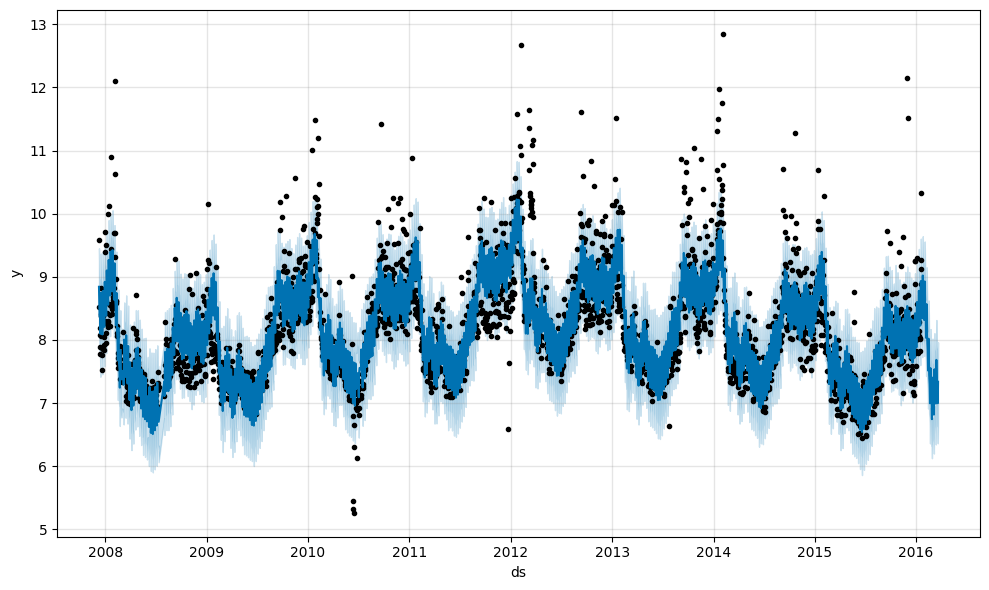

In [20]:
fig = m.plot(fc_2)

In [23]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, fc_2)


In [25]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:557: UserWarning:

Discarding nonzero nanoseconds in conversion.

